# Kernal & Imports

In [1]:
#Stop kernel from dying
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
# TensorFlow and keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [3]:
# Loads array of train axial 0000.npy
axial0000 = np.load(r'/Users/emilytsui/Downloads/MRnet-v1.0/train/axial/0000.npy')

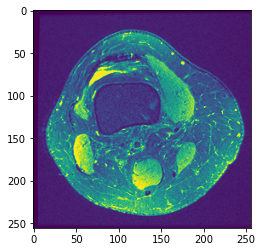

In [4]:
# Visualize np array, axial 0000
imgplot = plt.imshow(axial0000[9])

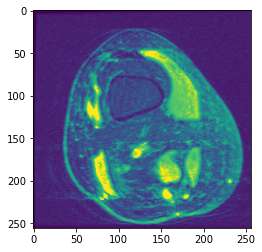

In [5]:
# Visualize axial 1152 array
imgplot1 = plt.imshow(np.load(r'/Users/emilytsui/Downloads/MRNet-v1.0/valid/axial/1152.npy')[0])

# Data Loading

In [6]:
# LOADING DATA
train_data = []
test_data = []

In [7]:
for x in os.listdir(r'/Users/emilytsui/Downloads/MRNet-v1.0/train/axial/'):
    try:
        train_data.append([np.load(r'/Users/emilytsui/Downloads/MRNet-v1.0/train/axial/'+x)[0],
                          np.load(r'/Users/emilytsui/Downloads/MRNet-v1.0/train/coronal/'+x)[0],
                          np.load(r'/Users/emilytsui/Downloads/MRNet-v1.0/train/sagittal/'+x)[0]])
    except:
        print(x)
for x in os.listdir(r'/Users/emilytsui/Downloads/MRNet-v1.0/valid/axial/'):
    try:
        test_data.append([np.load(r'/Users/emilytsui/Downloads/MRNet-v1.0/valid/axial/'+x)[0],
                          np.load(r'/Users/emilytsui/Downloads/MRNet-v1.0/valid/coronal/'+x)[0],
                          np.load(r'/Users/emilytsui/Downloads/MRNet-v1.0/valid/sagittal/'+x)[0]])
    except:
        print(x)

.DS_Store


In [8]:
np.array(train_data).shape

(1130, 3, 256, 256)

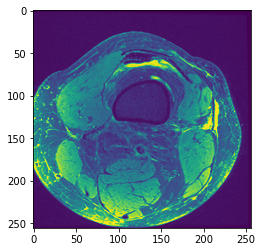

In [9]:
plt.imshow(train_data[1129][0])

In [10]:
train_data

[[array([[ 3,  3,  3, ...,  0,  0,  0],
         [ 8,  8,  6, ...,  0,  0,  0],
         [14, 12, 10, ...,  0,  0,  0],
         ...,
         [ 6, 14, 14, ...,  0,  0,  0],
         [ 6, 11,  9, ...,  0,  0,  0],
         [ 3,  5,  5, ...,  0,  0,  0]], dtype=uint8),
  array([[0, 1, 1, ..., 0, 0, 0],
         [1, 1, 1, ..., 0, 0, 0],
         [1, 2, 2, ..., 0, 0, 0],
         ...,
         [0, 0, 2, ..., 0, 0, 0],
         [0, 0, 2, ..., 0, 0, 0],
         [0, 0, 1, ..., 0, 0, 0]], dtype=uint8),
  array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 2, 2, 2],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)],
 [array([[0, 0, 0, ..., 0, 0, 0],
         [1, 3, 2, ..., 0, 0, 0],
         [0, 5, 3, ..., 0, 0, 0],
         ...,
         [4, 5, 4, ..., 2, 2, 2],
         [2, 2, 6, ..., 2, 3, 3],
         [4, 5, 2, ..., 5, 1, 0]], dtype=uint8),
  array([[0, 0, 0, ..., 0, 0, 0

# Loading Labels

In [11]:
# LOADING LABELS FROM CSV
train_ab_csv = pd.read_csv(r'/Users/emilytsui/Downloads/MRNet-v1.0/train-abnormal.csv', index_col=0)
train_acl_csv = pd.read_csv(r'/Users/emilytsui/Downloads/MRNet-v1.0/train-acl.csv', index_col=0)
train_meni_csv = pd.read_csv(r'/Users/emilytsui/Downloads/MRNet-v1.0/train-meniscus.csv', index_col=0)
test_ab_csv = pd.read_csv(r'/Users/emilytsui/Downloads/MRNet-v1.0/valid-abnormal.csv', index_col=0)
test_acl_csv = pd.read_csv(r'/Users/emilytsui/Downloads/MRNet-v1.0/valid-acl.csv', index_col=0)
test_meni_csv = pd.read_csv(r'/Users/emilytsui/Downloads/MRNet-v1.0/valid-meniscus.csv', index_col=0)

In [12]:
train_labels = [[1,0,0]]
test_labels = [[0,0,0]]

In [13]:
for x in range(1129):
  train_labels.append([tf.squeeze(train_ab_csv.values).numpy()[x], tf.squeeze(train_acl_csv.values).numpy()[x], tf.squeeze(train_meni_csv.values).numpy()[x]])
for x in range(119):
  test_labels.append([tf.squeeze(test_ab_csv.values).numpy()[x], tf.squeeze(test_acl_csv.values).numpy()[x], tf.squeeze(test_meni_csv.values).numpy()[x]])

In [14]:
train_labels[:3], test_labels[:3]

([[1, 0, 0], [1, 1, 1], [1, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0]])

In [15]:
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [16]:
train_data = np.array(train_data)
test_data = np.array(test_data)

In [17]:
train_data.shape,train_labels.shape

((1130, 3, 256, 256), (1130, 3))

# Model

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(3,256,256)),
                             tf.keras.layers.Dense(750,activation="relu"),
                             tf.keras.layers.Dense(750,activation="relu"),
                             tf.keras.layers.Dense(3,activation="sigmoid")
])

# Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=["accuracy"])

# Fit the model
model.fit(train_data,train_labels,epochs=50)

Train on 1130 samples
Epoch 1/50
1130/1130 [==============================] - 51s 45ms/sample - loss: 2750.9955 - accuracy: 0.6448
Epoch 2/50
1130/1130 [==============================] - 53s 47ms/sample - loss: 397.7830 - accuracy: 0.6531
Epoch 3/50
1130/1130 [==============================] - 46s 40ms/sample - loss: 84.5426 - accuracy: 0.6882
Epoch 4/50
1130/1130 [==============================] - 43s 38ms/sample - loss: 31.3972 - accuracy: 0.7062
Epoch 5/50
1130/1130 [==============================] - 43s 38ms/sample - loss: 19.8185 - accuracy: 0.7206
Epoch 6/50
1130/1130 [==============================] - 44s 39ms/sample - loss: 13.6423 - accuracy: 0.7354
Epoch 7/50
1130/1130 [==============================] - 45s 39ms/sample - loss: 11.6444 - accuracy: 0.7401
Epoch 8/50
1130/1130 [==============================] - 44s 39ms/sample - loss: 14.8870 - accuracy: 0.7100
Epoch 9/50
1130/1130 [==============================] - 43s 38ms/sample - loss: 8.7871 - accuracy: 0.7510
Epoch 10/50
1

In [ ]:
model.evaluate(test_data, test_labels)

In [ ]:
print(model.evaluate(test_data, test_labels, batch_size=1130))